In [42]:
# Импортируйте библиотеки pandas и numpy.
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
# Создайте датафреймы X и y из этих данных

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.datasets import load_boston

boston=load_boston()
type(boston)
boston.keys()
# boston
target = boston.target
# target
feature_names = boston.feature_names
# feature_names
data = boston.data
# data
X=pd.DataFrame(data, columns=feature_names)
X
y = pd.DataFrame(target, columns =['price'])
y.head()

# Разбейте эти датафреймы на тренировочные (X_train, y_train) и 
# тестовые (X_test, y_test) с помощью функции train_test_split так, 
# чтобы размер тестовой выборки
# составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.30, random_state = 42)
# y_train

# Создайте модель линейной регрессии под названием lr
# с помощью класса LinearRegression из модуля sklearn.linear_model.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Обучите модель на тренировочных данных (используйте все признаки) 
# и сделайте предсказание на тестовых.

lr.fit(X_train, y_train)
y_pred = lr.predict( X_test)

# Вычислите R2 полученных предказаний с помощью r2_score 
# из модуля sklearn.metrics.

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.7112260057484925

In [43]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)


from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000, random_state= 42, max_depth = 12)
rfr.fit(X_train_scaled, y_train.values[:,0])

y_pred = regressor.predict( X_test_scaled)
r2_score(y_test, y_pred)

0.8745853339617797

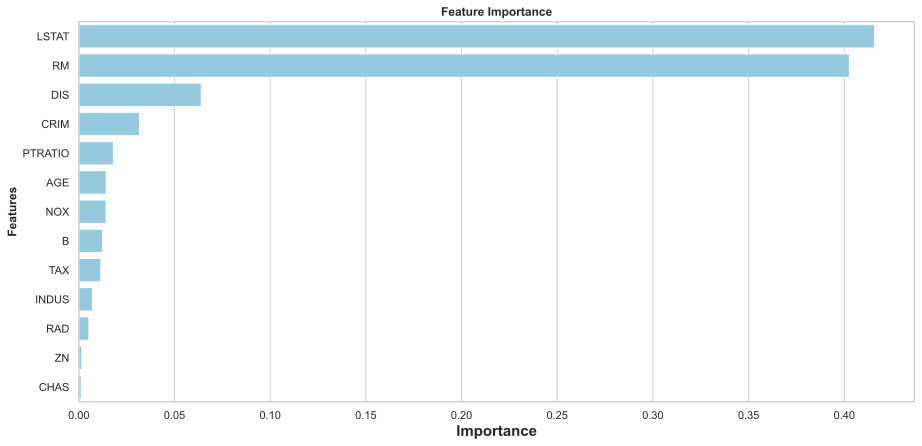

None

,PrmName,weight
0,LSTAT,0.415847
1,RM,0.402682
2,DIS,0.063973
3,CRIM,0.031676
4,PTRATIO,0.018081
5,AGE,0.014299
6,NOX,0.014269
7,B,0.012451
8,TAX,0.011525
9,INDUS,0.007138


In [55]:
feats = {}
for feature, importance in zip(feature_names, rfr.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'weight'})
importances = importances.sort_values(by='weight', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'PrmName'})

sns.set(font_scale = 1)
sns.set(style="whitegrid", color_codes=True, font_scale = 1)
fig, ax = plt.subplots()
fig.set_size_inches(15,7)


sns.barplot(x=importances['weight'], y=importances['PrmName'], data=importances, color='skyblue')

plt.xlabel('Importance', fontsize=15, weight = 'bold')
plt.ylabel('Features', fontsize=12, weight = 'bold')
plt.title('Feature Importance', fontsize=12, weight = 'bold')
display(plt.show())
display(importances)

# Параметры LSTAT и RM